<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Exercise_14_Simple_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

1.   Import classification_report and confusion_matrix from sklearn.metrics.
2.   Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
3. Instantiate a k-NN classifier with 6 neighbors, fit it to the training data, and predict the labels of the test set.
4. Compute and print the confusion matrix and classification report using the confusion_matrix() and classification_report() functions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
diabetes = pd.read_csv('diabetes.csv')

In [ ]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
y = diabetes['diabetes'].copy()
X = diabetes.copy().drop('diabetes', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [ ]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=6)
pipeline = make_pipeline(scaler, knn)

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       201
           1       0.67      0.47      0.55       107

    accuracy                           0.73       308
   macro avg       0.71      0.67      0.68       308
weighted avg       0.72      0.73      0.72       308



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[176  25]
 [ 57  50]]


## **Building a logistic regression model**

1.   Import:
*   LogisticRegression from sklearn.linear_model.
*   confusion_matrix and classification_report from sklearn.metrics.


2.   Create training and test sets with 40% (or 0.4) of the data used for testing. Use a random state of 42.
3. Instantiate a LogisticRegression classifier called logreg.
4. Fit the classifier to the training data and predict the labels of the test set.
4. Compute and print the confusion matrix and classification report.

In [ ]:
logreg = LogisticRegression(solver='liblinear')
pipeline = make_pipeline(scaler, logreg)

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       201
           1       0.64      0.54      0.59       107

    accuracy                           0.74       308
   macro avg       0.71      0.69      0.70       308
weighted avg       0.73      0.74      0.73       308



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[169  32]
 [ 49  58]]


## **Plotting an ROC curve**



*   Import roc_curve from sklearn.metrics.
* Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
*Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.
* Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.




In [ ]:
from sklearn.metrics import roc_curve, plot_roc_curve

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

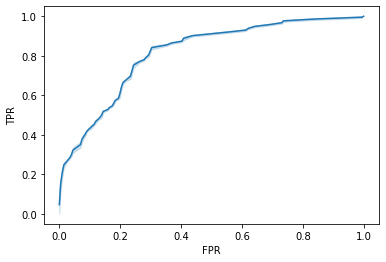

In [ ]:
sns.lineplot(x=fpr, y=tpr)
sns.lineplot(thresholds)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

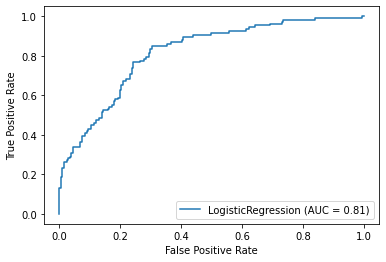

In [ ]:
plot_roc_curve(logreg, X_test, y_test)

## **AUC computation**
Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing.



*   Import roc_auc_score from sklearn.metrics and cross_val_score from sklearn.model_selection.
* Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
* Compute the AUC score using the roc_auc_score() function, the test set labels y_test, and the predicted probabilities y_pred_prob.
* Compute the AUC scores by performing 5-fold cross-validation. Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'.



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

In [ ]:
print('AUC Score :', roc_auc_score(y_test, y_pred_proba[:,1]))

AUC Score : 0.8148044822615893


In [ ]:
np.mean(cross_val_score(logreg, X_train, y_train, scoring='roc_auc'))

0.8143772470467386

## **Hyperparameter tuning with GridSearchCV**



*   Import LogisticRegression from sklearn.linear_model and GridSearchCV from sklearn.model_selection.
* Setup the hyperparameter grid by using c_space as the grid of values to tune  over.
* Instantiate a logistic regression classifier called logreg.
Use GridSearchCV with 5-fold cross-validation to tune :
* Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
* Use the .fit() method on the GridSearchCV object to fit it to the data X and y.
* Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'C' : [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]}

In [ ]:
logreg = LogisticRegression(solver='liblinear')

In [ ]:
logreg_cv = GridSearchCV(logreg, param_grid=params, cv=5, scoring='f1')
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
logreg_cv.best_params_

{'C': 5}

In [ ]:
logreg_cv.best_score_

0.6713228301752892

## **Hyperparameter tuning with RandomizedSearchCV**



*   Import DecisionTreeClassifier from sklearn.tree and RandomizedSearchCV from sklearn.model_selection.
* Specify the parameters and distributions to sample from. This has been done for you.
* Instantiate a DecisionTreeClassifier.
* Use RandomizedSearchCV with 5-fold cross-validation to tune the hyperparameters:
* Inside RandomizedSearchCV(), specify the classifier, parameter distribution, and number of folds to use.
* Use the .fit() method on the RandomizedSearchCV object to fit it to the data X and y.
* Print the best parameter and best score obtained from RandomizedSearchCV by accessing the best_params_ and best_score_ attributes of tree_cv.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
params = {'criterion' : ['gini', 'entropy'], 'min_samples_leaf' : [1,2,3,4,5], 'max_depth':[2,3,4,5]}

In [ ]:
tree_cv = RandomizedSearchCV(tree, param_distributions=params, scoring='f1', cv=5)
tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}

In [ ]:
tree_cv.best_score_

0.6273922657413693